In [119]:
import pandas as pd
import numpy as np
import math
import os
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA                 # for dimensionality reduction using PCA
# from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns            # visualization tool
import matplotlib.cm as cm       # for colour mapping to use for the pca plots

In [120]:
def process_one_csv(file_name,k):
    data = pd.read_csv('/home/amaya/emp/all/User'+str(k)+'/'+file_name)
    global classes
    
    class_ = file_name[0:len(file_name)-14]
    
    # print(data.head(2))

    columns = list(data.columns)[1:]
    # features = ['MAV','RMS','VAR','SSI','MAX','MIN']
    
    vector = []
    # global out_columns
    
    for item in columns:
        temp = list(data[item])
        # calculating MAV ***
        # out_columns.append(item+features[0])
        abs_val = list(map(abs,temp))
        vector.append(np.mean(abs_val))

        # calculating RMS ***
        # out_columns.append(item+features[1])
        vector.append(np.sqrt(np.mean(np.array(temp)**2)))

        # calculate variance ***
        # out_columns.append(item+features[2])
        x_mean = np.mean(temp)
        dif = temp - x_mean
        vector.append(np.mean(np.array(dif)**2))

        # calculating ssi ***
        # out_columns.append(item+features[3])
        vector.append(np.sum(np.array(temp)**2))

        # calculating max ***
        # out_columns.append(item+features[4])
        vector.append(max(temp))

        # calculating min ***
        # out_columns.append(item+features[5])
        vector.append(min(temp))
        
    if class_ in classes:
        vector.append(classes.index(class_))
    else:
        classes.append(class_)
        vector.append(classes.index(class_))
        
    return vector


In [121]:
out_columns = ['EMG0LMAV', 'EMG0LRMS', 'EMG0LVAR', 'EMG0LSSI', 'EMG0LMAX', 'EMG0LMIN', 'EMG1LMAV', 'EMG1LRMS', 'EMG1LVAR', 'EMG1LSSI', 'EMG1LMAX', 'EMG1LMIN', 'EMG2LMAV', 'EMG2LRMS', 'EMG2LVAR', 'EMG2LSSI', 'EMG2LMAX', 'EMG2LMIN', 'EMG3LMAV', 'EMG3LRMS', 'EMG3LVAR', 'EMG3LSSI', 'EMG3LMAX', 'EMG3LMIN', 'EMG4LMAV', 'EMG4LRMS', 'EMG4LVAR', 'EMG4LSSI', 'EMG4LMAX', 'EMG4LMIN', 'EMG5LMAV', 'EMG5LRMS', 'EMG5LVAR', 'EMG5LSSI', 'EMG5LMAX', 'EMG5LMIN', 'EMG6LMAV', 'EMG6LRMS', 'EMG6LVAR', 'EMG6LSSI', 'EMG6LMAX', 'EMG6LMIN', 'EMG7LMAV', 'EMG7LRMS', 'EMG7LVAR', 'EMG7LSSI', 'EMG7LMAX', 'EMG7LMIN', 'AXLMAV', 'AXLRMS', 'AXLVAR', 'AXLSSI', 'AXLMAX', 'AXLMIN', 'AYLMAV', 'AYLRMS', 'AYLVAR', 'AYLSSI', 'AYLMAX', 'AYLMIN', 'AZLMAV', 'AZLRMS', 'AZLVAR', 'AZLSSI', 'AZLMAX', 'AZLMIN', 'GXLMAV', 'GXLRMS', 'GXLVAR', 'GXLSSI', 'GXLMAX', 'GXLMIN', 'GYLMAV', 'GYLRMS', 'GYLVAR', 'GYLSSI', 'GYLMAX', 'GYLMIN', 'GZLMAV', 'GZLRMS', 'GZLVAR', 'GZLSSI', 'GZLMAX', 'GZLMIN', 'ORLMAV', 'ORLRMS', 'ORLVAR', 'ORLSSI', 'ORLMAX', 'ORLMIN', 'OPLMAV', 'OPLRMS', 'OPLVAR', 'OPLSSI', 'OPLMAX', 'OPLMIN', 'OYLMAV', 'OYLRMS', 'OYLVAR', 'OYLSSI', 'OYLMAX', 'OYLMIN', 'EMG0RMAV', 'EMG0RRMS', 'EMG0RVAR', 'EMG0RSSI', 'EMG0RMAX', 'EMG0RMIN', 'EMG1RMAV', 'EMG1RRMS', 'EMG1RVAR', 'EMG1RSSI', 'EMG1RMAX', 'EMG1RMIN', 'EMG2RMAV', 'EMG2RRMS', 'EMG2RVAR', 'EMG2RSSI', 'EMG2RMAX', 'EMG2RMIN', 'EMG3RMAV', 'EMG3RRMS', 'EMG3RVAR', 'EMG3RSSI', 'EMG3RMAX', 'EMG3RMIN', 'EMG4RMAV', 'EMG4RRMS', 'EMG4RVAR', 'EMG4RSSI', 'EMG4RMAX', 'EMG4RMIN', 'EMG5RMAV', 'EMG5RRMS', 'EMG5RVAR', 'EMG5RSSI', 'EMG5RMAX', 'EMG5RMIN', 'EMG6RMAV', 'EMG6RRMS', 'EMG6RVAR', 'EMG6RSSI', 'EMG6RMAX', 'EMG6RMIN', 'EMG7RMAV', 'EMG7RRMS', 'EMG7RVAR', 'EMG7RSSI', 'EMG7RMAX', 'EMG7RMIN', 'AXRMAV', 'AXRRMS', 'AXRVAR', 'AXRSSI', 'AXRMAX', 'AXRMIN', 'AYRMAV', 'AYRRMS', 'AYRVAR', 'AYRSSI', 'AYRMAX', 'AYRMIN', 'AZRMAV', 'AZRRMS', 'AZRVAR', 'AZRSSI', 'AZRMAX', 'AZRMIN', 'GXRMAV', 'GXRRMS', 'GXRVAR', 'GXRSSI', 'GXRMAX', 'GXRMIN', 'GYRMAV', 'GYRRMS', 'GYRVAR', 'GYRSSI', 'GYRMAX', 'GYRMIN', 'GZRMAV', 'GZRRMS', 'GZRVAR', 'GZRSSI', 'GZRMAX', 'GZRMIN', 'ORRMAV', 'ORRRMS', 'ORRVAR', 'ORRSSI', 'ORRMAX', 'ORRMIN', 'OPRMAV', 'OPRRMS', 'OPRVAR', 'OPRSSI', 'OPRMAX', 'OPRMIN', 'OYRMAV', 'OYRRMS', 'OYRVAR', 'OYRSSI', 'OYRMAX', 'OYRMIN','CLASS']
# 205 columns (34*6 + 1)
output = []
classes=[]
# print(len(out_columns))

# process_one_csv(files[0])
for k in range(1,11):
    if(k!=5):
        files = os.listdir('/home/amaya/emp/all/User'+str(k)+'/')
    else:
        continue
    for file in files:
        if(file[-1] == 'v'):      # to avoid _DS_STORE files and anyother hiiden files
            output.append(process_one_csv(file,k))
        
processed = pd.DataFrame(output,columns = out_columns)

,EMG0LMAV,EMG0LRMS,EMG0LVAR,EMG0LSSI,EMG0LMAX,EMG0LMIN,EMG1LMAV,EMG1LRMS,EMG1LVAR,EMG1LSSI,...,OPRSSI,OPRMAX,OPRMIN,OYRMAV,OYRRMS,OYRVAR,OYRSSI,OYRMAX,OYRMIN,CLASS
0,3.24,6.346653,38.8400,2014,26,-28,9.66,14.110280,193.8100,9955,...,609430,140,51,148.80,149.169032,109.9600,1112570,168,140,0
1,5.18,8.162108,64.9300,3331,20,-26,10.34,14.476878,208.2804,10479,...,407702,127,54,141.52,141.799436,79.1696,1005354,155,127,1
2,6.62,9.841748,91.9316,4843,24,-25,11.90,20.072369,390.3684,20145,...,432441,126,54,143.96,144.144095,53.0384,1038876,156,131,1
3,4.74,7.159609,51.0484,2563,23,-23,7.00,9.711848,93.6144,4716,...,698427,149,52,20.10,24.560537,199.2100,30161,38,0,2
4,1.06,1.421267,0.9796,101,1,-3,1.18,1.449138,0.8900,105,...,649322,135,57,144.76,145.658642,260.9824,1060822,162,122,3
5,3.72,5.433231,28.6736,1476,18,-12,6.80,11.706409,136.7696,6852,...,445234,125,50,133.90,134.244329,92.3300,901077,149,121,4
6,3.40,4.971921,23.9456,1236,13,-15,7.32,11.490866,131.9376,6602,...,299098,133,54,130.10,130.414953,82.0500,850403,147,121,5
7,2.68,3.600000,12.8816,648,11,-7,4.42,7.245688,49.8756,2625,...,529735,127,49,60.76,89.729594,4359.6224,402570,179,1,6
8,0.90,1.174734,0.7716,69,1,-3,0.98,1.256981,0.7700,79,...,946045,161,54,158.02,159.591666,499.1796,1273475,177,119,7
9,1.00,1.296148,0.6800,84,0,-3,1.06,1.392839,1.1300,97,...,505493,148,54,124.60,125.438272,209.6000,786738,153,111,8


In [122]:
# feature scaling of data
scaler = preprocessing.MinMaxScaler()    # which scaler is better???????????????
scaled_df = scaler.fit_transform(processed[out_columns[:len(out_columns)-1]])
X = pd.DataFrame(scaled_df, columns = out_columns[:len(out_columns)-1])
y = processed['CLASS']

/home/amaya/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [123]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20)
svclassifier = SVC(kernel = 'rbf', C = 10.0, gamma = 0.1)
svclassifier.fit(X_train,y_train)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [124]:
# dimensionality reduction to training set

'''pca = PCA(n_components = 2)
newFeatures = pca.fit_transform(X_train)
newdf = pd.DataFrame(newFeatures,columns = ['Principal Component 1', 'Principal Component 2'])
svclassifier.fit(newdf,y_train)
newdf['CLASS'] = list(y_train)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
clind = list(range(20))
colors = cm.rainbow(np.linspace(0, 1, 20))
for ind, color in zip(clind,colors):
    indicesToKeep = newdf['CLASS'] == ind
    ax.scatter(newdf.loc[indicesToKeep, 'Principal Component 1']
               , newdf.loc[indicesToKeep, 'Principal Component 2']
               , c = color
               , s = 50)
ax.legend(clind)
ax.grid()'''

"pca = PCA(n_components = 2)\nnewFeatures = pca.fit_transform(X_train)\nnewdf = pd.DataFrame(newFeatures,columns = ['Principal Component 1', 'Principal Component 2'])\nsvclassifier.fit(newdf,y_train)\nnewdf['CLASS'] = list(y_train)\n\nfig = plt.figure(figsize = (8,8))\nax = fig.add_subplot(1,1,1) \nax.set_xlabel('Principal Component 1', fontsize = 15)\nax.set_ylabel('Principal Component 2', fontsize = 15)\nclind = list(range(20))\ncolors = cm.rainbow(np.linspace(0, 1, 20))\nfor ind, color in zip(clind,colors):\n    indicesToKeep = newdf['CLASS'] == ind\n    ax.scatter(newdf.loc[indicesToKeep, 'Principal Component 1']\n               , newdf.loc[indicesToKeep, 'Principal Component 2']\n               , c = color\n               , s = 50)\nax.legend(clind)\nax.grid()"

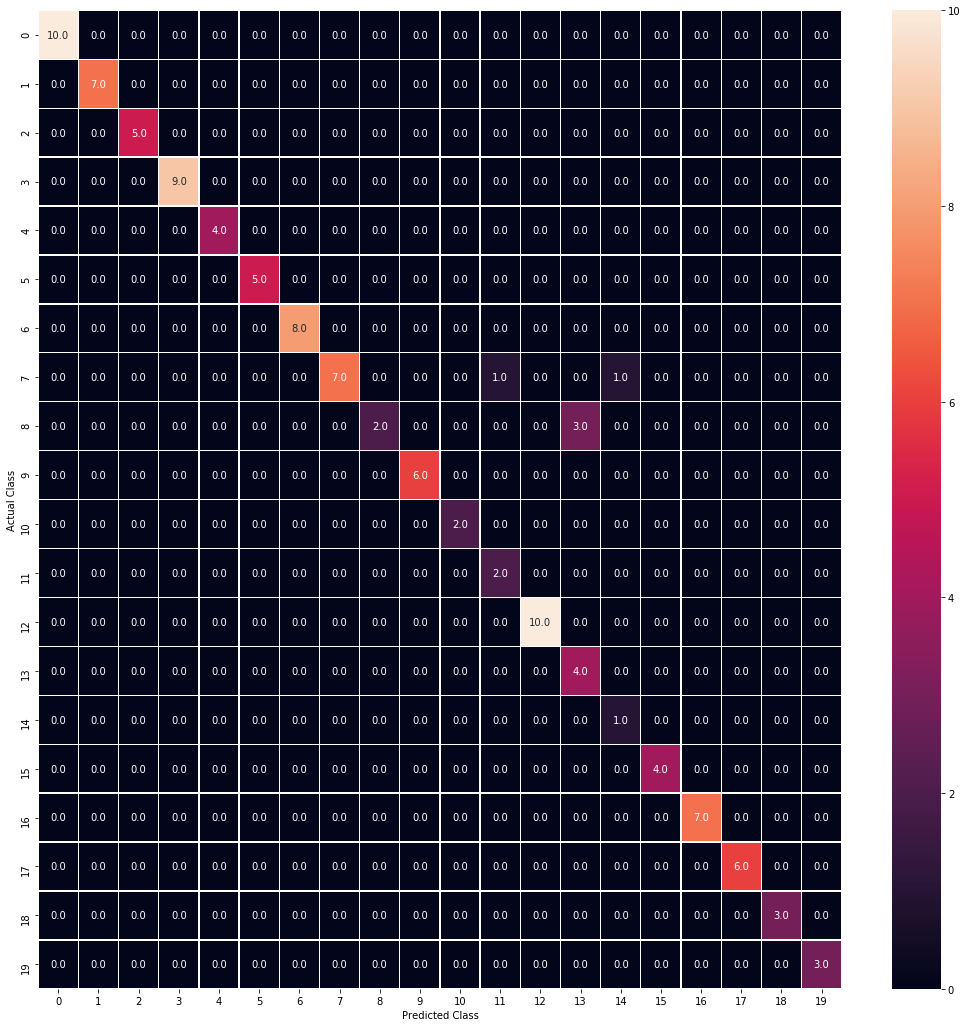

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         8
           7       1.00      0.78      0.88         9
           8       1.00      0.40      0.57         5
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00         2
          11       0.67      1.00      0.80         2
          12       1.00      1.00      1.00        10
          13       0.57      1.00      0.73         4
          14       0.50      1.00      0.67         1
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         7
          17       1.00    

In [125]:
# dimesionality reduction to test set
# newFeaturesTest = pca.fit_transform(X_test)
# newtest = pd.DataFrame(newFeaturesTest,columns = ['Principal Component 1', 'Principal Component 2'])
# ****************************************************************************************************

# Usual code:
y_pred = svclassifier.predict(X_test)
#result = [y_pred[i] == y_test[i] for i in range(len(y_test))]
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, linewidths=.3, fmt= '.1f',ax=ax)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(classification_report(y_test,y_pred))

In [126]:
# PCA plot for the test set
'''newtest['CLASS'] = list(y_pred)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
for ind, color in zip(clind,colors):
    indicesToKeep = newtest['CLASS'] == ind
    ax.scatter(newtest.loc[indicesToKeep, 'Principal Component 1']
               , newtest.loc[indicesToKeep, 'Principal Component 2']
               , c = color
               , s = 50)
ax.legend(clind)
ax.grid()'''

"newtest['CLASS'] = list(y_pred)\n\nfig = plt.figure(figsize = (8,8))\nax = fig.add_subplot(1,1,1) \nax.set_xlabel('Principal Component 1', fontsize = 15)\nax.set_ylabel('Principal Component 2', fontsize = 15)\nfor ind, color in zip(clind,colors):\n    indicesToKeep = newtest['CLASS'] == ind\n    ax.scatter(newtest.loc[indicesToKeep, 'Principal Component 1']\n               , newtest.loc[indicesToKeep, 'Principal Component 2']\n               , c = color\n               , s = 50)\nax.legend(clind)\nax.grid()"

In [127]:
# print(classes)

['large', 'happy', 'shirt', 'bird', 'hurt', 'cost', 'wash', 'horse', 'cat', 'hot', 'pizza', 'gold', 'blue', 'mom', 'orange', 'home', 'day', 'dollar', 'please', 'goodnight']
